In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings


In [3]:
warnings.filterwarnings('ignore')
train_titanic_df = pd.read_csv('../data/train.csv')
test_titanic_df = pd.read_csv('../data/test.csv')
train_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
train_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Fonction pour afficher le nombre d'elements sur les barres

def add_value_on_the_plot(plot):
    # for ax in plot.axes.flat:  
    for p in plot.patches:
        height = p.get_height()
        if height > 0:    
            plot.text(
                p.get_x() + p.get_width() / 2,
                height,
                f'{int(height)}',
                ha='center',
                va='bottom'
            )

### Le nombre de passagers pour chaque classe

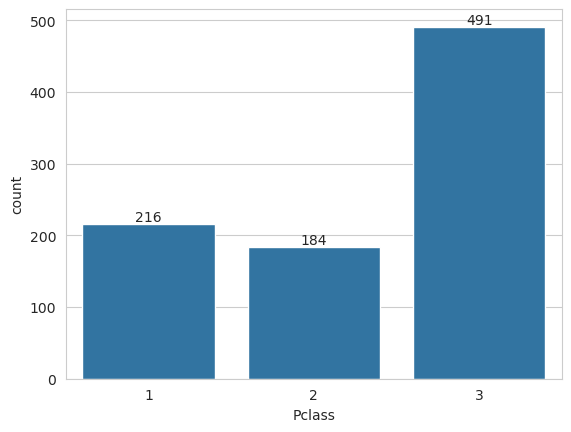

In [7]:
sns.set_style('whitegrid')
plot = sns.countplot(data=train_titanic_df, x='Pclass')
add_value_on_the_plot(plot)

On constate que la plus part des passagers voyageaient en 3ème classe.

### La repartition global de l'Age par Sex

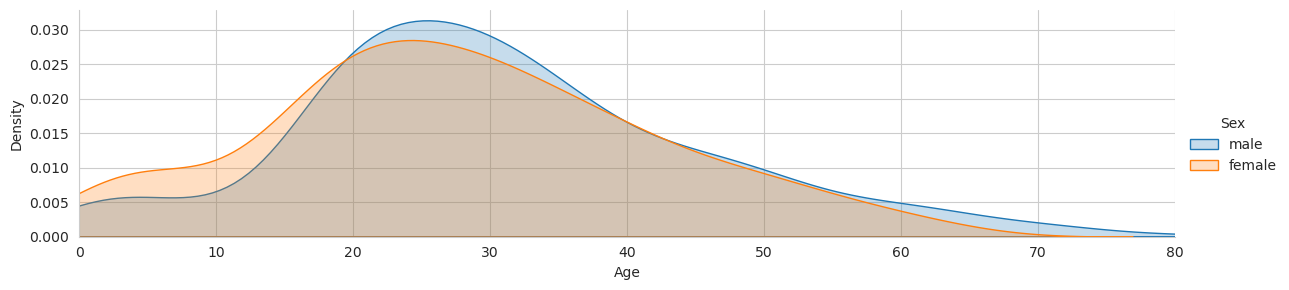

In [8]:
fig = sns.FacetGrid(data=train_titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = train_titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

Sur cette figure nous avons la Réprésentation de la densité globale des passagers en fonction de l'age en tanant compte du sex.<br>
On constate que la plus part des passagers étaient agés entre 20 et 30 ans

### La repartition des hommes et femmes par classes

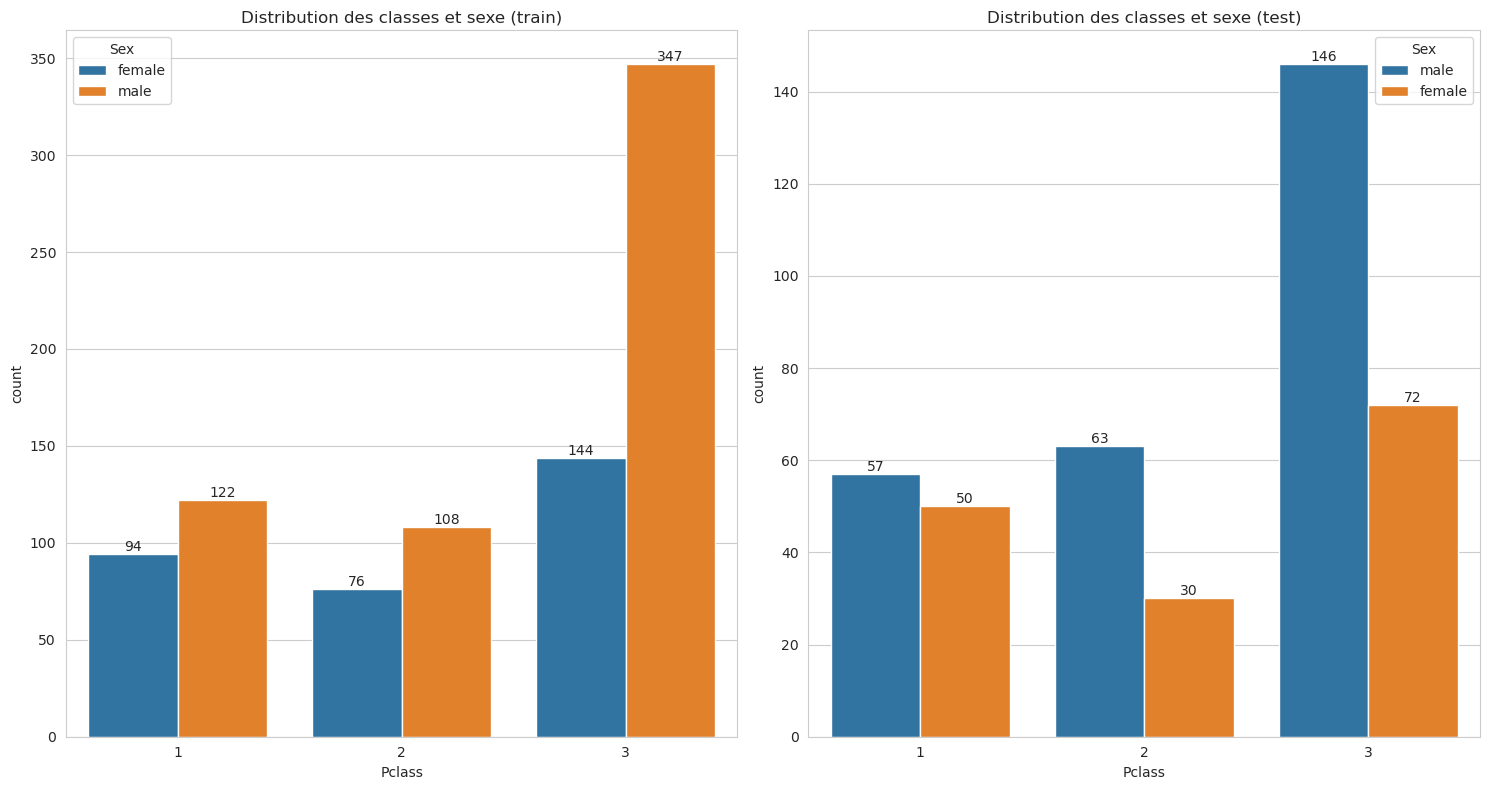

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 8))
sns.set_style('whitegrid')

# Graphique pour train_titanic_df
plot1 = sns.countplot(x='Pclass', hue='Sex', data=train_titanic_df, ax=ax[0])
ax[0].set_title("Distribution des classes et sexe (train)")
add_value_on_the_plot(ax[0])

# Graphique pour test_titanic_df
plot2 = sns.countplot(x='Pclass', hue='Sex', data=test_titanic_df, ax=ax[1])
ax[1].set_title("Distribution des classes et sexe (test)")
add_value_on_the_plot(ax[1])

plt.tight_layout()  # Ajuste les espacements pour éviter le chevauchement
plt.show()


Sur ces figures nous avons la repartion des hommes et femmes par classe.<br>Pour les classes 1 et 2 on note une différence peux significative entre le nombres de femmes et d'hommes comparé à la classe 3 où les hommes sont largement majoritaire.<br>Cela indique que la plus part des hommes voyageaient en 3ème classe.

### La relation entre les survivants et les classes

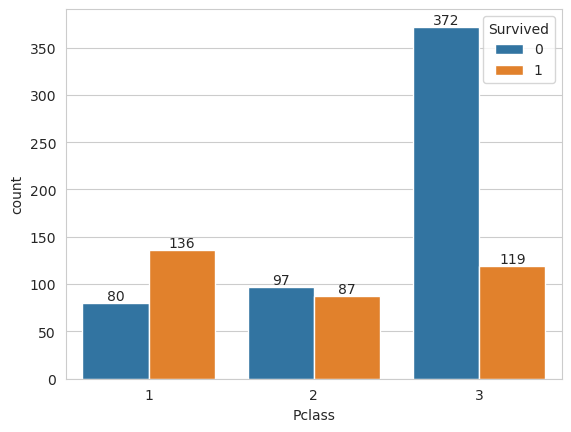

In [10]:
sns.set_style('whitegrid')

countplot = sns.countplot(x='Pclass', hue='Survived', data=train_titanic_df)
add_value_on_the_plot(countplot)
plt.show()

Cette figure nous indique la relation entre les passagers qui ont survécu et les classes de voyages.<br>Ce graphique nous montre qu'on a plus de sens de survivre en voyangeant dans la classe 1 soit environ 62,96% 

### Le nombre de survivant par Sex

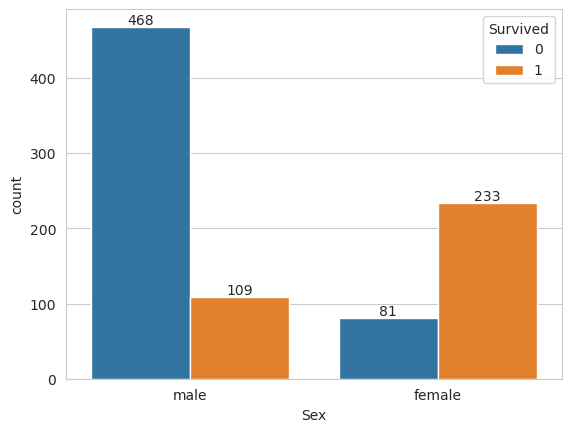

In [11]:
sns.set_style('whitegrid')
countplot = sns.countplot(data=train_titanic_df, x='Sex', hue='Survived')
add_value_on_the_plot(countplot)
plt.show()

Ce graphique nous montre la relation entre le nombre de survivant et leur sexe

### Les tranches d'ages par classes

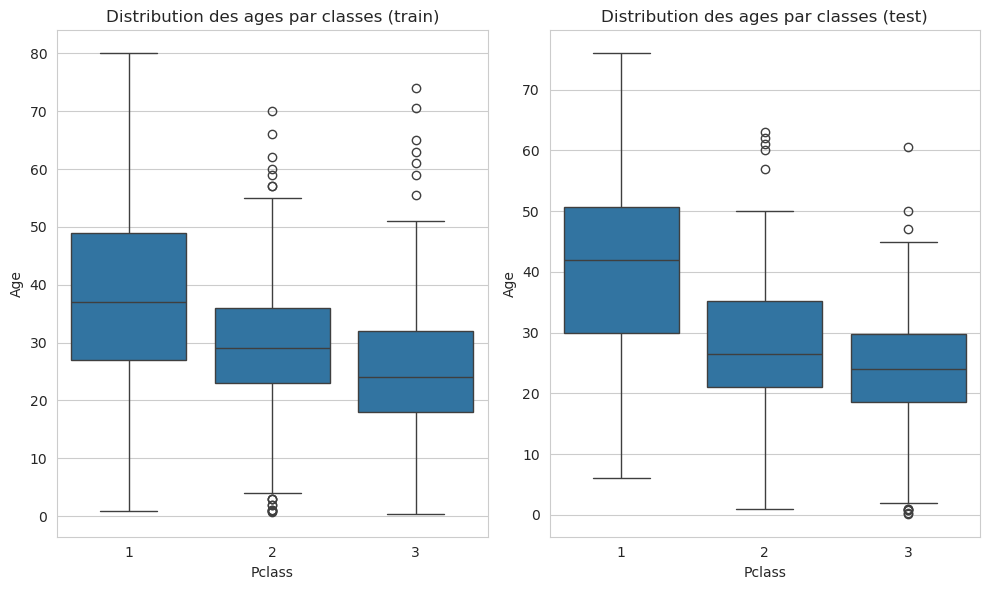

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 6))

sns.boxplot(data=train_titanic_df, x='Pclass', y='Age', ax=ax[0])
ax[0].set_title("Distribution des ages par classes (train)")
sns.boxplot(data=test_titanic_df, x='Pclass', y='Age', ax=ax[1])
ax[1].set_title("Distribution des ages par classes (test)")

plt.tight_layout()
plt.show()


Ce graphe nous montre la distribution des ages par classe pour le train et test set.<br>
- *Pour le train set*:<br>
En première classe, la médiane est d’environ 40 ans, avec une large répartition jusqu’à 80 ans.<br>
La majorité des passagers en première classe sont des adultes entre 30 et 50 ans.<br>
La deuxième classe a une médiane autour de 30 ans, avec moins d'écarts extrêmes que la première classe.<br>
Quelques jeunes enfants sont présents en deuxième classe, mais ils sont rares.<br>
La troisième classe a une médiane plus basse (20-25 ans), avec une proportion notable de jeunes et d'enfants.<br>
Les enfants en bas âge sont plus présents en troisième classe, comme le montrent les outliers.<br>
Globalement, les âges diminuent avec la classe, reflétant des différences socio-économiques.<br><br>

- *Pour le test set*:<br>
En première classe, la médiane est également proche de 40 ans, confirmant une cohérence avec l’ensemble d’entraînement.<br>
L’étendue des âges est légèrement plus limitée, avec un maximum autour de 70 ans.<br>
La deuxième classe conserve une médiane de 28-30 ans, légèrement plus basse que dans l’ensemble train.<br>
La répartition des âges en deuxième classe reste homogène, avec moins d'outliers.<br>
En troisième classe, la médiane (20-25 ans) et la forte présence de jeunes sont similaires à train.<br>
Les enfants en bas âge restent marqués par des outliers dans cette classe.<br>
Les distributions des âges dans les deux ensembles montrent une cohérence générale et reflètent les mêmes tendances.<br>

### Les repatitions des ages de ceux qui ont survecue par classe

<Axes: xlabel='Pclass', ylabel='Age'>

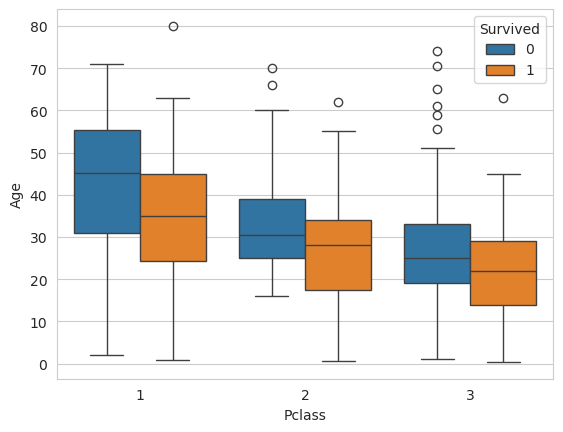

In [13]:
sns.boxplot(data=train_titanic_df, x='Pclass', y='Age', hue='Survived')

La survie semble favorisée par la jeunesse, particulièrement en première et troisième classes, où les survivants ont une médiane d'âge plus basse.<br>
En première classe, les passagers plus jeunes (environ 35 ans) survivent davantage que les plus âgés (médiane de 45 ans).<br>
En deuxième classe, l’écart entre survivants et non-survivants est moins marqué, mais les enfants semblent bénéficier d’un avantage.<br>
En troisième classe, les enfants (outliers) ont eu des chances accrues de survie, tandis que les jeunes adultes sont majoritairement non-survivants.<br>
L’âge et la classe sociale influencent ensemble les chances de survie, les priorités étant données aux enfants et aux passagers des classes supérieures.<br>
Ces tendances reflètent des différences dans les conditions de sauvetage, soulignant l’impact des priorités sociétales et des ressources disponibles.<br>

### Relation entre les passagers qui ont survecu et leur port d'embarquement

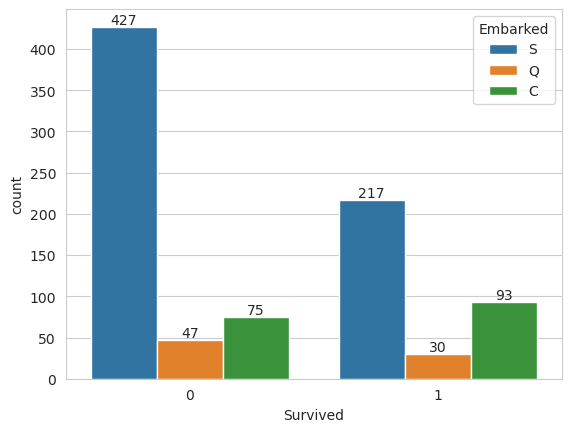

In [14]:
# Création du catplot
sns.set_style('whitegrid')
countplot = sns.countplot(data=train_titanic_df, x='Survived', hue='Embarked')
add_value_on_the_plot(countplot)

plt.show()


Cette visualisation montre les statistiques de survie du Titanic selon le port d'embarquement (S=Southampton, Q=Queenstown, C=Cherbourg) :
Southampton (S) avait le plus grand nombre de passagers avec 644 personnes au total, dont seulement 217 ont survécu (34%). Cherbourg (C) comptait 168 passagers avec un meilleur taux de survie de 55% (93 survivants). Queenstown (Q) avait le plus petit nombre avec 77 passagers dont 30 ont survécu (39%). Le fait que Cherbourg ait un meilleur taux de survie pourrait s'expliquer par une proportion plus élevée de passagers de première classe embarqués dans ce port, confirmant l'impact de la classe sociale sur les chances de survie 

### La relation entre ceux qui ont une famille et qui ont servecu

Text(0.5, 0.98, 'Relation entre les survivants et leurs familles')

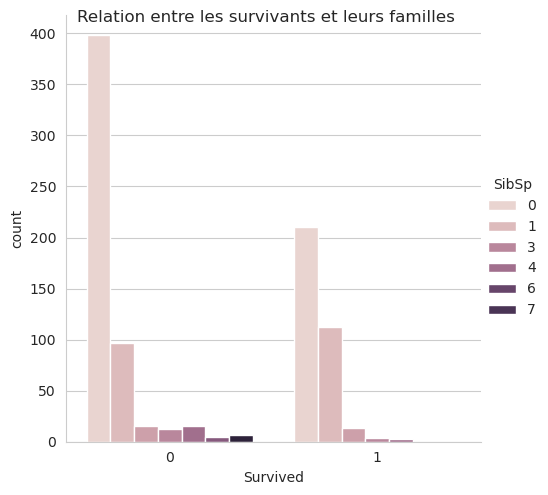

In [15]:
sns.set_style('whitegrid')
catplot = sns.catplot(data=train_titanic_df, x='Survived', hue='SibSp', kind='count')
catplot.fig.suptitle('Relation entre les survivants et leurs familles')

Cette visualisation montre la relation entre la survie et le nombre de frères/sœurs/conjoints (SibSp) à bord du Titanic :

Les passagers voyageant seuls (SibSp = 0) ou avec un seul membre de famille (SibSp = 1) avaient les meilleures chances de survie. En effet, parmi ceux qui ont survécu, environ 200 voyageaient seuls et 100 avec un membre de famille. Les passagers avec de grandes familles (SibSp ≥ 3) avaient des taux de survie significativement plus faibles, probablement car il était plus difficile de coordonner l'évacuation en groupe nombreux. Cette donnée suggère que la taille du groupe familial a joué un rôle crucial dans les chances de survie lors du naufrage, avec un avantage net pour les personnes seules ou en petit groupe.

### Relation entre le prix du billet et la survie

Text(0.12, 1.01, 'FARE BY SURVIVED - CLIPPED TO REMOVE OUTLIERS')

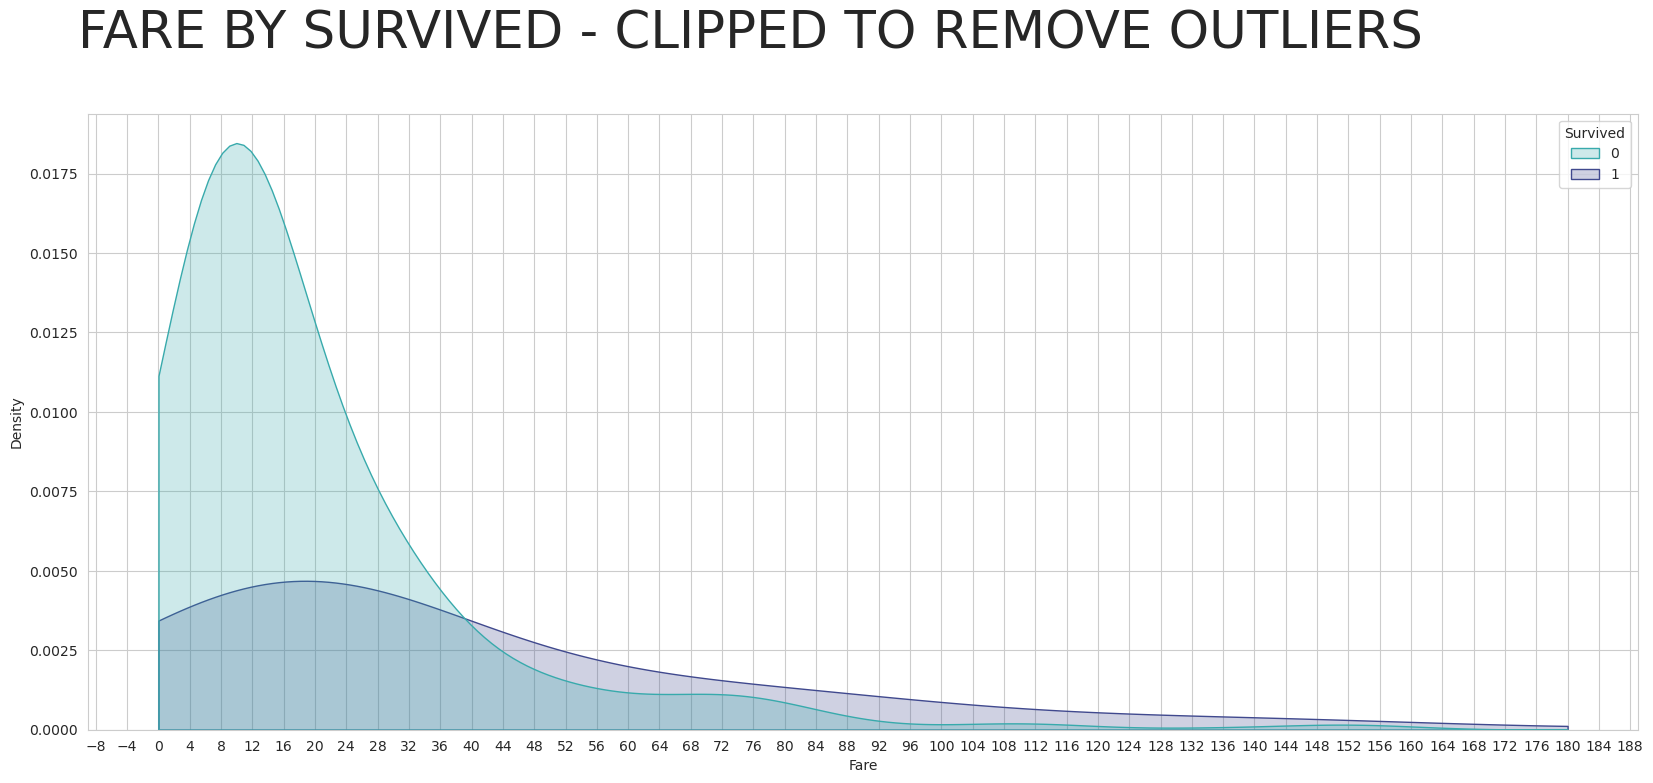

In [16]:
fig = plt.figure(figsize=(20,8))
kde = sns.kdeplot(x="Fare", data=train_titanic_df, cut=0, clip=[0,180], hue="Survived", fill=True, legend=True, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(4))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("FARE BY SURVIVED - CLIPPED TO REMOVE OUTLIERS", x=0.12, y=1.01, ha='left',
             fontweight=100, size=37)



Ce graphique de densité montre la relation entre le prix du billet (Fare) et la survie au naufrage du Titanic :<br>
Le graphique montre que la majorité des victimes (courbe turquoise) avaient payé des billets entre 0 et 20£, avec un pic très marqué autour de 8£, typique des billets de 3ème classe. Les survivants (courbe violette) présentent une distribution plus uniforme, s'étendant jusqu'à 80£ environ. À partir de 40£, la proportion de survivants devient plus importante que celle des victimes, confirmant que les passagers ayant payé des billets plus chers (1ère et 2ème classe) avaient significativement plus de chances de survie. Cette visualisation nettoyée renforce encore plus clairement l'impact de la classe sociale sur la survie lors du naufrage.